# Entrega N°1 Data Science - Coder House 

![Logo de Python](https://www.python.org/static/community_logos/python-logo.png)  

### El Dataset Elegido es sobre Diabetes, el mismo lo descargue de Kagle

#### El objetivo de la seleccion es poder predecir en base a ciertos factores la posbilidad de que una persona sea diabetica, para ello se estudiara y limpiara el Dataset elegido para obtner los mejores resultados posibles

In [1]:
# Importo librerías
import pandas as pd

In [2]:
# Cargar el dataset y veo las primeras 10 filas
file_path = 'diabetes_data.csv'
df = pd.read_csv(file_path)
df.head (100)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13.0,0.0,0.0,1.0,22.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
96,9.0,0.0,0.0,1.0,21.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0
97,10.0,0.0,1.0,1.0,35.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
98,10.0,0.0,1.0,1.0,31.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [4]:
# Renombrar columnas a nombres en castellano para que la lectura sea mas sencilla
df.rename(columns={
    'Age': 'Edad',
    'Sex': 'Sexo',
    'HighChol': 'ColesterolAlto',
    'CholCheck': 'ChequeoColesterol',
    'BMI': 'IMC',  # Índice de Masa Corporal
    'Smoker': 'Fumador',
    'HeartDiseaseorAttack': 'EnfermedadCardiacaOataque',
    'PhysActivity': 'ActividadFisica',
    'Fruits': 'ConsumoFrutas',
    'Veggies': 'ConsumoVerduras',
    'HvyAlcoholConsump': 'ConsumoAlcohólicoExcesivo',
    'GenHlth': 'SaludGeneral',
    'MentHlth': 'SaludMental',
    'PhysHlth': 'SaludFisica',
    'DiffWalk': 'DificultadParaCaminar',
    'Stroke': 'DerrameCerebral',
    'HighBP': 'PresionArterialAlta',
    'Diabetes': 'Diabetes'
}, inplace=True)

# Mostrar las primeras filas del DataFrame con los nuevos nombres
df.head (10)

,Edad,Sexo,ColesterolAlto,ChequeoColesterol,IMC,Fumador,EnfermedadCardiacaOataque,ActividadFisica,ConsumoFrutas,ConsumoVerduras,ConsumoAlcohólicoExcesivo,SaludGeneral,SaludMental,SaludFisica,DificultadParaCaminar,DerrameCerebral,PresionArterialAlta,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
6,13.0,1.0,1.0,1.0,26.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,6.0,0.0,0.0,0.0,0.0


In [5]:
#Quiero verificar datos faltantes#

print(df.isnull().sum())

Edad                         0
Sexo                         0
ColesterolAlto               0
ChequeoColesterol            0
IMC                          0
Fumador                      0
EnfermedadCardiacaOataque    0
ActividadFisica              0
ConsumoFrutas                0
ConsumoVerduras              0
ConsumoAlcohólicoExcesivo    0
SaludGeneral                 0
SaludMental                  0
SaludFisica                  0
DificultadParaCaminar        0
DerrameCerebral              0
PresionArterialAlta          0
Diabetes                     0
dtype: int64


In [6]:
# Eliminar duplicados
df.drop_duplicates(inplace=True)

In [7]:
# Estadísticas descriptivas para IMC y Edad
print(df[['Edad', 'IMC']].describe())

               Edad           IMC
count  64020.000000  64020.000000
mean       8.607420     30.178554
std        2.860717      7.287730
min        1.000000     12.000000
25%        7.000000     25.000000
50%        9.000000     29.000000
75%       11.000000     34.000000
max       13.000000     98.000000


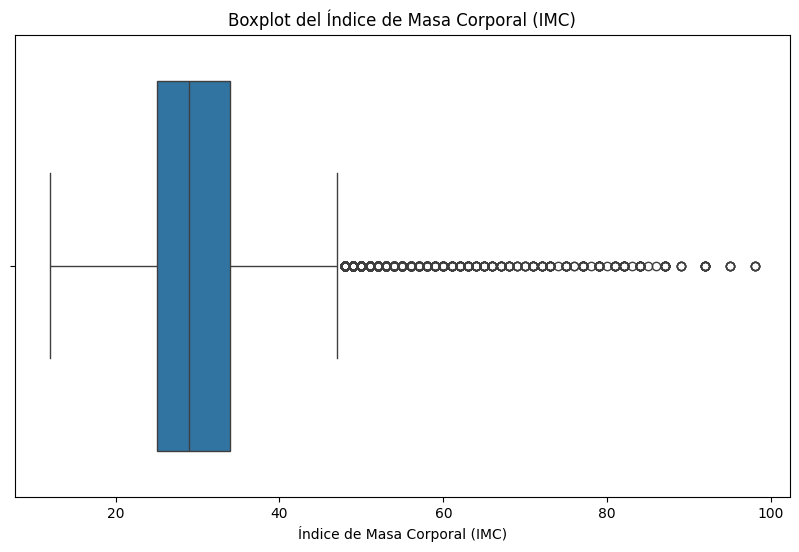

In [8]:
# Quiero Analizar los Outliers de IMC#
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un boxplot de IMC
plt.figure(figsize=(10, 6))
sns.boxplot(x='IMC', data=df)

# Ajustar título y etiquetas
plt.title('Boxplot del Índice de Masa Corporal (IMC)')
plt.xlabel('Índice de Masa Corporal (IMC)')

# Mostrar el gráfico
plt.show()

In [9]:
# Calcular estadísticas descriptivas para IMC
imc_stats = df['IMC'].describe()
print("\nEstadísticas descriptivas para IMC:")
print(imc_stats)


Estadísticas descriptivas para IMC:
count    64020.000000
mean        30.178554
std          7.287730
min         12.000000
25%         25.000000
50%         29.000000
75%         34.000000
max         98.000000
Name: IMC, dtype: float64


In [10]:
# Calcular cuartiles
Q1 = df['IMC'].quantile(0.25)  # Primer cuartil
Q3 = df['IMC'].quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1  # Rango intercuartílico

# Definir límites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nLímite inferior: {lower_bound}")
print(f"Límite superior: {upper_bound}")


Límite inferior: 11.5
Límite superior: 47.5


In [11]:
# Identificar outliers en IMC
outliers_imc = df[(df['IMC'] < lower_bound) | (df['IMC'] > upper_bound)]

# Mostrar los outliers encontrados
print("\nValores atípicos (outliers) en IMC:")
print(outliers_imc)

# Eliminar los valores anómalos
df = df[~((df['IMC'] < lower_bound) | (df['IMC'] > upper_bound))]

# Mostrar las primeras filas del DataFrame limpio
print("\nDataFrame sin valores anómalos:")
print(df.head())


Valores atípicos (outliers) en IMC:
       Edad  Sexo  ColesterolAlto  ChequeoColesterol   IMC  Fumador  \
13     10.0   1.0             0.0                1.0  58.0      0.0   
192     6.0   1.0             0.0                1.0  52.0      1.0   
199     8.0   0.0             0.0                1.0  69.0      0.0   
284     9.0   0.0             0.0                0.0  56.0      0.0   
446     4.0   0.0             0.0                1.0  52.0      1.0   
...     ...   ...             ...                ...   ...      ...   
70450   7.0   0.0             0.0                1.0  61.0      0.0   
70539   7.0   0.0             0.0                1.0  51.0      0.0   
70606   8.0   0.0             1.0                1.0  48.0      0.0   
70637   6.0   1.0             1.0                1.0  60.0      1.0   
70648   7.0   0.0             1.0                1.0  49.0      0.0   

       EnfermedadCardiacaOataque  ActividadFisica  ConsumoFrutas  \
13                           0.0          

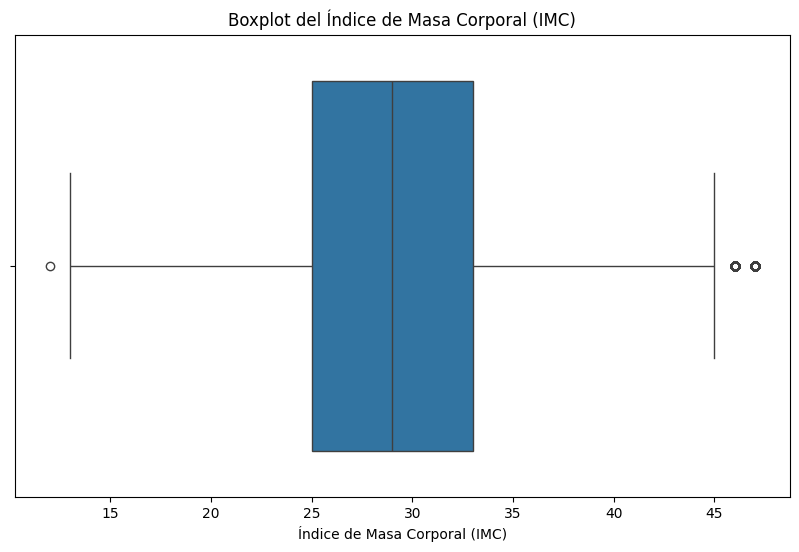

In [12]:
# Quiero Analizar los Outliers de IMC luego de la limpieza para corroborar
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un boxplot de IMC
plt.figure(figsize=(10, 6))
sns.boxplot(x='IMC', data=df)

# Ajustar título y etiquetas
plt.title('Boxplot del Índice de Masa Corporal (IMC)')
plt.xlabel('Índice de Masa Corporal (IMC)')

# Mostrar el gráfico
plt.show()

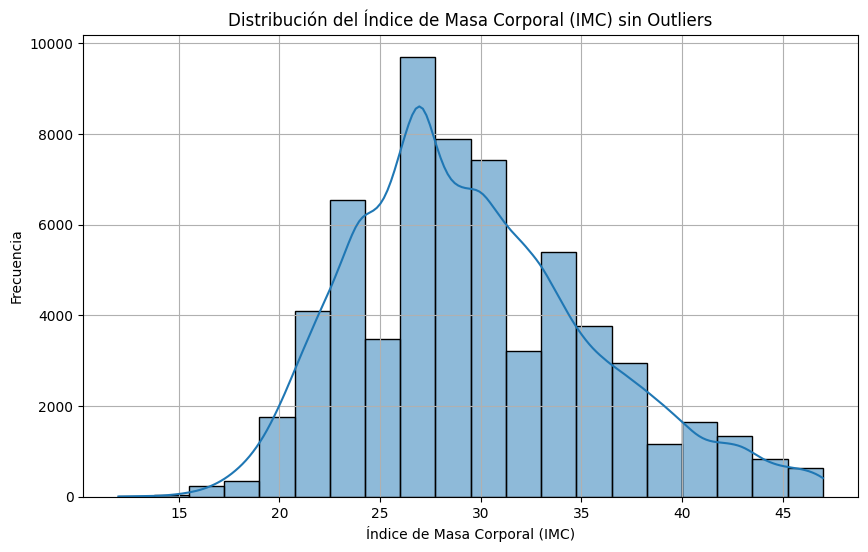

In [13]:
# Crear un histograma del IMC sin outliers
plt.figure(figsize=(10, 6))
sns.histplot(df['IMC'], bins=20, kde=True)  # kde=True añade la estimación de densidad
plt.title('Distribución del Índice de Masa Corporal (IMC) sin Outliers')
plt.xlabel('Índice de Masa Corporal (IMC)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [14]:
# Obtener estadísticas descriptivas de la columna Edad
print("\nEstadísticas descriptivas de la Edad:")
print(df['Edad'].describe())


Estadísticas descriptivas de la Edad:
count    62473.000000
mean         8.631265
std          2.866848
min          1.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         13.000000
Name: Edad, dtype: float64


In [15]:
# Contar la frecuencia de cada categoría de edad
age_counts = df['Edad'].value_counts().sort_index()

# Mostrar los resultados
print("\nFrecuencia de cada categoría de edad:")
print(age_counts)


Frecuencia de cada categoría de edad:
Edad
1.0      882
2.0     1231
3.0     1766
4.0     2416
5.0     3040
6.0     4040
7.0     5986
8.0     7594
9.0     8845
10.0    9364
11.0    7219
12.0    5003
13.0    5087
Name: count, dtype: int64


In [16]:
# Definir un diccionario para mapear los códigos a rangos
age_mapping = {
    1: '18-24',
    2: '25-29',
    3: '30-39',
    4: '40-49',
    5: '50-59',
    6: '60-64',
    7: '65-69',
    8: '70-74',
    9: '60-64',
    10: '75-79',
    11: '80 o más'
}

# Crear una nueva columna con los rangos mapeados
df['RangoEdad'] = df['Edad'].map(age_mapping)

# Contar el número de registros en cada rango de edad
rango_edad_counts = df['RangoEdad'].value_counts().sort_index()

print("\nConteo de personas en cada rango de edad:")
print(rango_edad_counts)


Conteo de personas en cada rango de edad:
RangoEdad
18-24         882
25-29        1231
30-39        1766
40-49        2416
50-59        3040
60-64       12885
65-69        5986
70-74        7594
75-79        9364
80 o más     7219
Name: count, dtype: int64


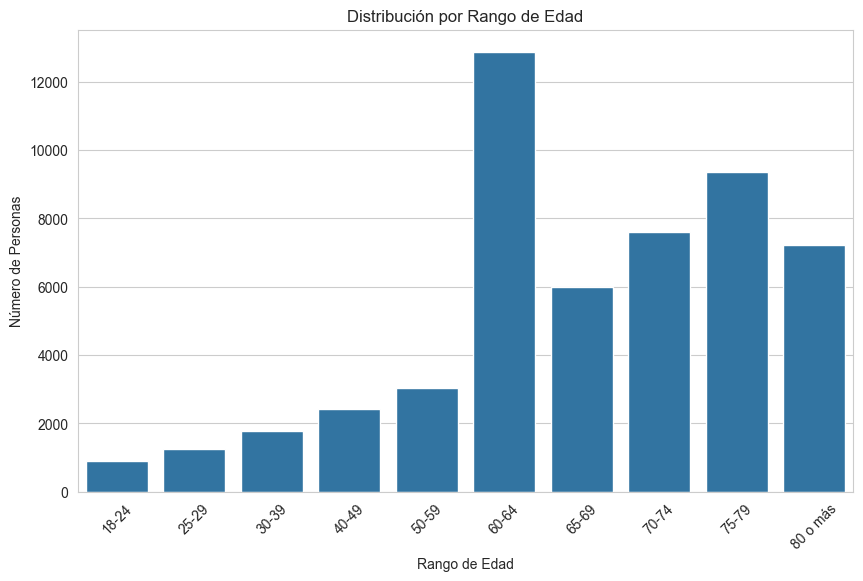

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de Seaborn
sns.set_style('whitegrid')

# Crear un gráfico de barras para visualizar la distribución por rango de edad
plt.figure(figsize=(10, 6))
sns.barplot(x=rango_edad_counts.index, y=rango_edad_counts.values)
plt.title('Distribución por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Número de Personas')
plt.xticks(rotation=45)
plt.show()

### Creacion de Grafico de Pareto (80-20)

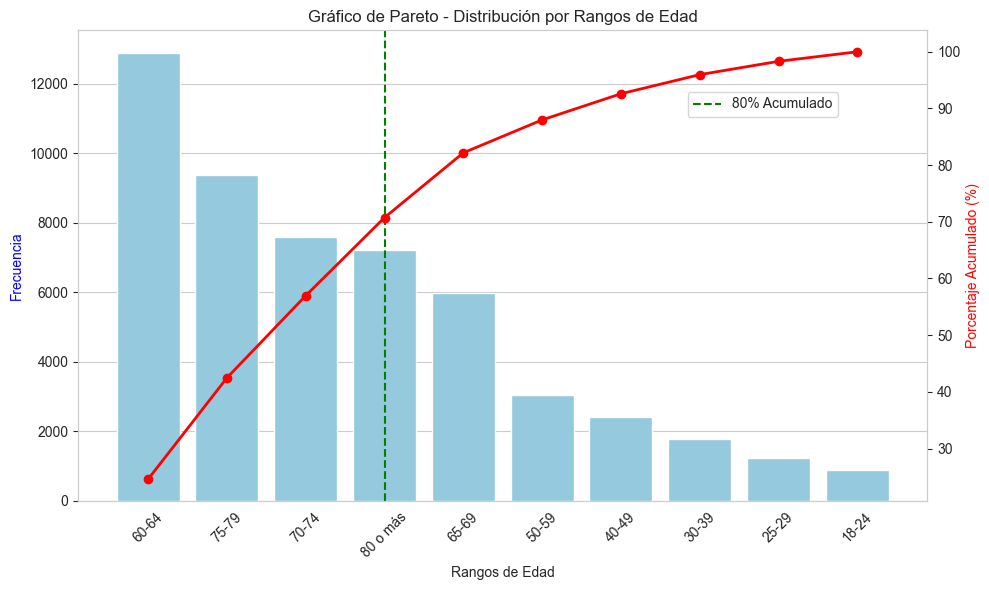

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir el mapeo de rangos de edad
age_mapping = {
    1: '18-24',
    2: '25-29',
    3: '30-39',
    4: '40-49',
    5: '50-59',
    6: '60-64',
    7: '65-69',
    8: '70-74',
    9: '60-64',  # Posible duplicado
    10: '75-79',
    11: '80 o más'
}

# Crear columna con los rangos mapeados
df['RangoEdad'] = df['Edad'].map(age_mapping)

# Contar el número de registros en cada rango de edad, ordenado de mayor a menor
rango_edad_counts = df['RangoEdad'].value_counts().sort_values(ascending=False)

# Calcular el porcentaje acumulado
porcentaje_acumulado = rango_edad_counts.cumsum() / rango_edad_counts.sum() * 100

# Encontrar el punto donde se alcanza el 80%
limite_80 = porcentaje_acumulado[porcentaje_acumulado <= 80].index[-1]

# Configurar el gráfico de Pareto
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras (frecuencia ordenada)
sns.barplot(
    x=rango_edad_counts.index, 
    y=rango_edad_counts.values, 
    color='skyblue', 
    ax=ax1
)
ax1.set_ylabel('Frecuencia', color='blue')
ax1.set_xlabel('Rangos de Edad')
plt.xticks(rotation=45)

# Crear un segundo eje para la línea de porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(rango_edad_counts.index, porcentaje_acumulado, color='red', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Porcentaje Acumulado (%)', color='red')
ax2.grid(False)  # Eliminar la cuadrícula del eje derecho

# Agregar una línea vertical donde se alcanza el 80%
ax1.axvline(x=limite_80, color='green', linestyle='--', linewidth=1.5, label='80% Acumulado')
plt.title('Gráfico de Pareto - Distribución por Rangos de Edad')

# Mostrar leyenda y ajustar diseño
fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.85))
plt.tight_layout()
plt.show()

In [19]:
# Definir los rangos de edad mayores de 60 años
rangos_mayores_60 = ['60-64', '65-69', '70-74', '75-79', '80 o más']

# Filtrar el dataset original
df_mayores_60 = df[df['RangoEdad'].isin(rangos_mayores_60)]

# Mostrar las primeras filas del nuevo dataset
print("Nuevo dataset para mayores de 60 años:")
print(df_mayores_60.head(5))

Nuevo dataset para mayores de 60 años:
    Edad  Sexo  ColesterolAlto  ChequeoColesterol   IMC  Fumador  \
3   11.0   1.0             1.0                1.0  28.0      1.0   
4    8.0   0.0             0.0                1.0  29.0      1.0   
7    6.0   1.0             0.0                1.0  31.0      1.0   
9    6.0   1.0             0.0                1.0  27.0      1.0   
12   7.0   1.0             1.0                1.0  27.0      0.0   

    EnfermedadCardiacaOataque  ActividadFisica  ConsumoFrutas  \
3                         0.0              1.0            1.0   
4                         0.0              1.0            1.0   
7                         0.0              0.0            1.0   
9                         0.0              0.0            1.0   
12                        0.0              1.0            1.0   

    ConsumoVerduras  ConsumoAlcohólicoExcesivo  SaludGeneral  SaludMental  \
3               1.0                        0.0           3.0          0.0   
4      

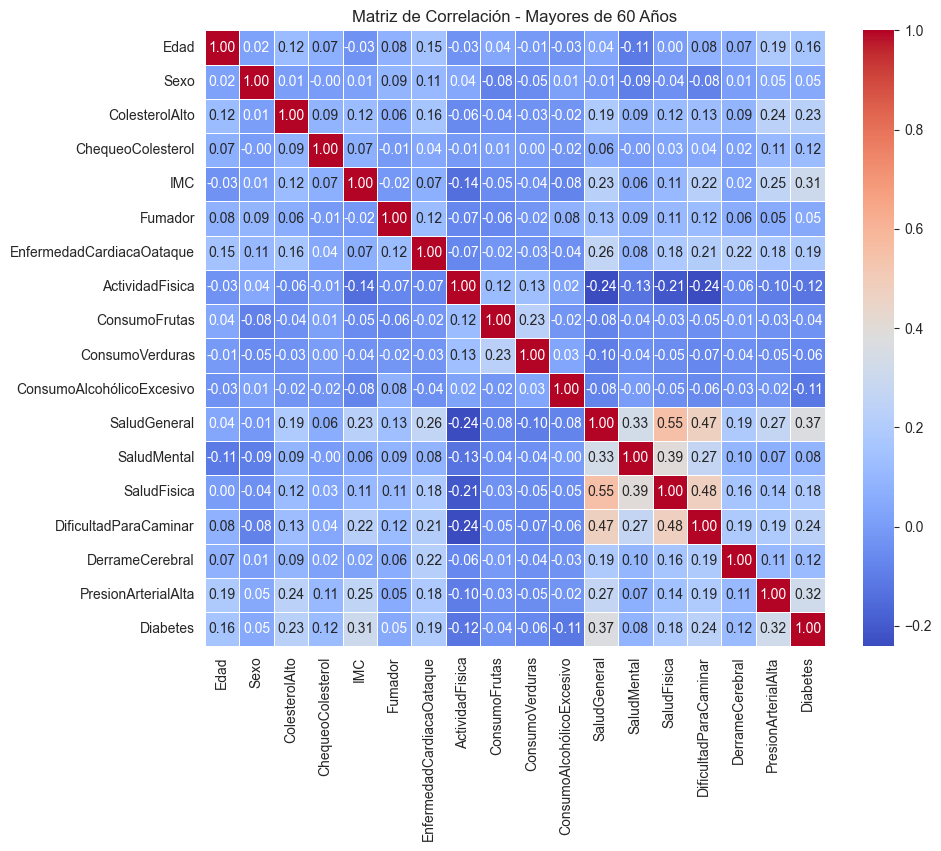

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas
df_numerico = df_mayores_60.select_dtypes(include=['number'])

# Calcular la matriz de correlación
matriz_corr = df_numerico.corr()


# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación - Mayores de 60 Años")
plt.show()

# La correlacion sigue sin ser buena

### A modo de conclucion para esta primera etapa se ve que las predicciones del dataset no tienen una buena correlacion de valores